In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1.0/255)
imgdir = 'images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
    imgdir + '/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    classes=['other', 'car'],
    seed=12345,
    shuffle=True)

Found 1600 images belonging to 2 classes.


(32, 64, 64, 3)


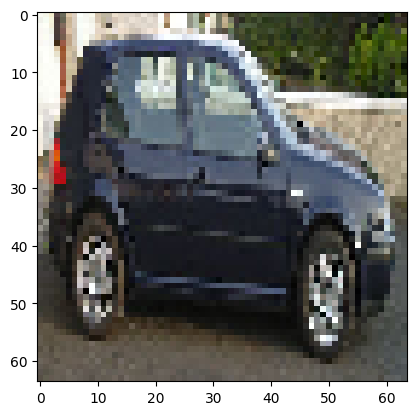

In [3]:
import matplotlib.pyplot as plt

Xbatch, Ybatch = train_generator.next()
print(Xbatch.shape)
plt.imshow(Xbatch[4])

We start by reading the images and rescaling their pixel values to be in the [0,1] range and look at an example.

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

def make_convnet():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [5]:
validation_generator = data_gen.flow_from_directory(
    imgdir + '/validation',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    classes=['other', 'car'],
    seed=12345,
    shuffle=True)

Found 576 images belonging to 2 classes.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

np.random.seed(0)
model = make_convnet()
print(model.summary())
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x=train_generator, callbacks=callback, epochs=100, verbose=2, validation_data=validation_generator)
model.save_weights('car_cnn.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0

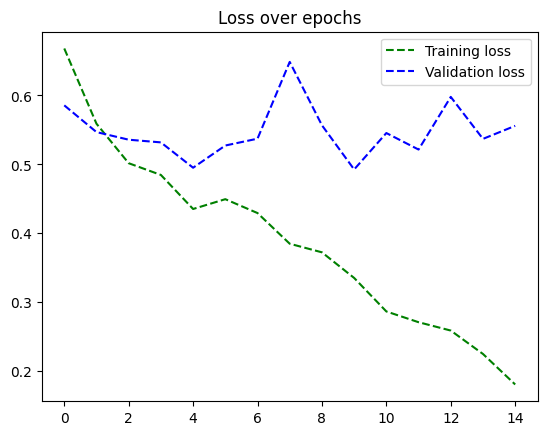

In [7]:
plt.plot(history.history['loss'], '--g', label='Training loss')
plt.plot(history.history['val_loss'], '--b', label='Validation loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

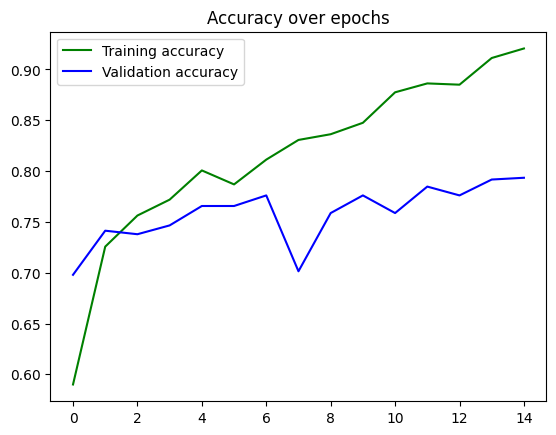

In [8]:
plt.plot(history.history['accuracy'], '-g', label='Training accuracy')
plt.plot(history.history['val_accuracy'], '-b', label='Validation accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

### Augmentation

In [9]:
data_gen_aug = ImageDataGenerator(rescale=1.0/255,
                                  rotation_range=10,
                                  zoom_range=0.1,
                                  brightness_range=[0.8, 1],
                                  shear_range=10.0)


train_generator_aug = data_gen_aug.flow_from_directory(
    imgdir + '/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    classes=['other', 'car'],
    seed=12345,
    shuffle=True)

Found 1600 images belonging to 2 classes.


In [10]:
np.random.seed(0)
model_aug = make_convnet()
model_aug.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history_aug = model_aug.fit(x=train_generator_aug, callbacks=callback, epochs=100, verbose=2, validation_data=validation_generator)
model_aug.save_weights('car_cnn_aug.h5')

Epoch 1/100
50/50 - 5s - loss: 0.6671 - accuracy: 0.5800 - val_loss: 0.6927 - val_accuracy: 0.6181 - 5s/epoch - 103ms/step
Epoch 2/100
50/50 - 4s - loss: 0.6060 - accuracy: 0.6850 - val_loss: 0.5901 - val_accuracy: 0.6962 - 4s/epoch - 88ms/step
Epoch 3/100
50/50 - 4s - loss: 0.5647 - accuracy: 0.7325 - val_loss: 0.6205 - val_accuracy: 0.7205 - 4s/epoch - 87ms/step
Epoch 4/100
50/50 - 5s - loss: 0.5626 - accuracy: 0.7294 - val_loss: 0.5628 - val_accuracy: 0.7257 - 5s/epoch - 92ms/step
Epoch 5/100
50/50 - 5s - loss: 0.5101 - accuracy: 0.7575 - val_loss: 0.6198 - val_accuracy: 0.7188 - 5s/epoch - 93ms/step
Epoch 6/100
50/50 - 4s - loss: 0.4850 - accuracy: 0.7700 - val_loss: 0.5633 - val_accuracy: 0.7378 - 4s/epoch - 88ms/step
Epoch 7/100
50/50 - 4s - loss: 0.4886 - accuracy: 0.7638 - val_loss: 0.5261 - val_accuracy: 0.7413 - 4s/epoch - 87ms/step
Epoch 8/100
50/50 - 4s - loss: 0.4525 - accuracy: 0.7887 - val_loss: 0.5105 - val_accuracy: 0.7656 - 4s/epoch - 88ms/step
Epoch 9/100
50/50 - 4s 

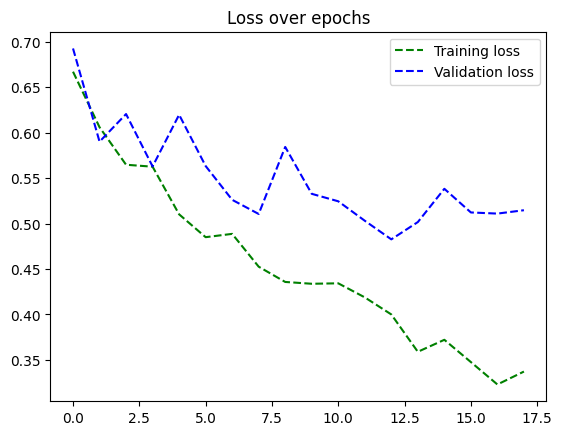

In [11]:
plt.plot(history_aug.history['loss'], '--g', label='Training loss')
plt.plot(history_aug.history['val_loss'], '--b', label='Validation loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

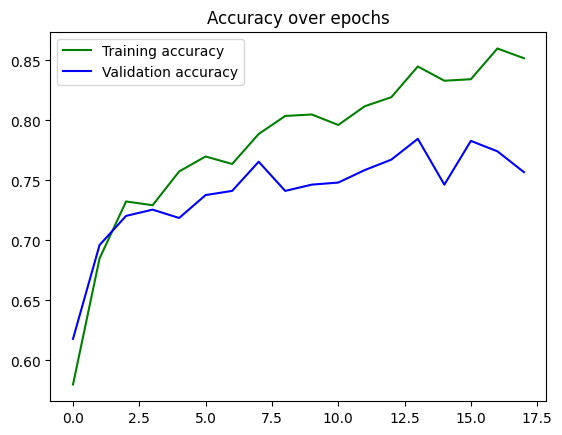

In [12]:
plt.plot(history_aug.history['accuracy'], '-g', label='Training accuracy')
plt.plot(history_aug.history['val_accuracy'], '-b', label='Validation accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

### Transfer learning

1/1 [==============================] - 0s 191ms/step
[[('n03594945', 'jeep', 0.83393574), ('n03478589', 'half_track', 0.114188895), ('n04461696', 'tow_truck', 0.021135397), ('n02701002', 'ambulance', 0.020903708), ('n04252225', 'snowplow', 0.0029162131)]]


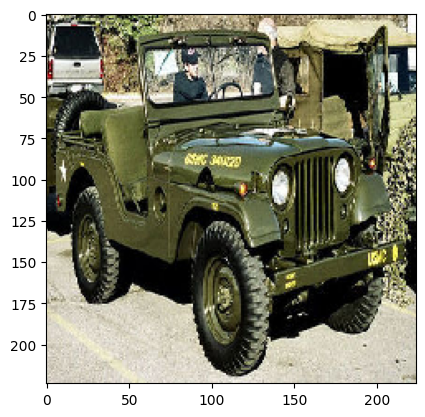

In [14]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

path = imgdir + '/train/car/0010.jpg'
img = load_img(path, target_size=(224, 224))
plt.imshow(img)

img = img_to_array(img)
img = preprocess_input(img)
img = img.reshape(1, 224, 224, 3)

pred = vggmodel.predict(img)
print(decode_predictions(pred))

Above, we can see that the VGG16 model predicts that this image is depicting a jeep with an 83% certainty. As we can clearly see, this is a very good guess.

In [15]:
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

def create_vgg16_features(path, filename):
    generator = vgg_data_gen.flow_from_directory(
        path,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False
    )
    features = feature_extractor.predict(generator)
    with open(filename, 'wb') as f:
        np.save(f, features)

In [16]:
create_vgg16_features(imgdir + '/train', 'train_features.npy')
create_vgg16_features(imgdir + '/validation', 'validation_features.npy')

Found 1600 images belonging to 2 classes.
50/50 [==============================] - 8s 159ms/step
Found 576 images belonging to 2 classes.
18/18 [==============================] - 3s 155ms/step


In [17]:
def make_convnet_vgg():
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(1000, activation='softmax', kernel_regularizer='l2'))
    return model

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))

def train_on_cnnfeatures():

    with open('train_features.npy', 'rb') as f:
        train_features = np.load(f)
    with open('validation_features.npy', 'rb') as f:
        validation_features = np.load(f)

    train_labels = get_labels(train_features.shape[0])
    validation_labels = get_labels(validation_features.shape[0])
    callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    #callback = ModelCheckpoint(filepath='checkpoint_vgg.h5', monitor = 'val_loss', save_best_only=True, save_weights_only=True)
    model = make_convnet_vgg()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
    history = model.fit(x=train_features, y=train_labels, validation_data=(validation_features, validation_labels), callbacks = callback, epochs = 100, verbose = 2)
    model.save_weights('vgg.h5')
    return history

history_vgg = train_on_cnnfeatures()

Epoch 1/100
50/50 - 1s - loss: 9.9280 - accuracy: 0.7250 - val_loss: 2.5821 - val_accuracy: 0.8507 - 1s/epoch - 21ms/step
Epoch 2/100
50/50 - 1s - loss: 1.6494 - accuracy: 0.9031 - val_loss: 2.1696 - val_accuracy: 0.8611 - 791ms/epoch - 16ms/step
Epoch 3/100
50/50 - 1s - loss: 0.9030 - accuracy: 0.9388 - val_loss: 2.0386 - val_accuracy: 0.8594 - 821ms/epoch - 16ms/step
Epoch 4/100
50/50 - 1s - loss: 0.6622 - accuracy: 0.9481 - val_loss: 1.8675 - val_accuracy: 0.8750 - 803ms/epoch - 16ms/step
Epoch 5/100
50/50 - 1s - loss: 0.4361 - accuracy: 0.9694 - val_loss: 1.8757 - val_accuracy: 0.8646 - 803ms/epoch - 16ms/step
Epoch 6/100
50/50 - 1s - loss: 0.3483 - accuracy: 0.9775 - val_loss: 1.8779 - val_accuracy: 0.8698 - 860ms/epoch - 17ms/step
Epoch 7/100
50/50 - 1s - loss: 0.2776 - accuracy: 0.9862 - val_loss: 1.7947 - val_accuracy: 0.8698 - 840ms/epoch - 17ms/step
Epoch 8/100
50/50 - 1s - loss: 0.2316 - accuracy: 0.9975 - val_loss: 1.7905 - val_accuracy: 0.8698 - 831ms/epoch - 17ms/step
Epo

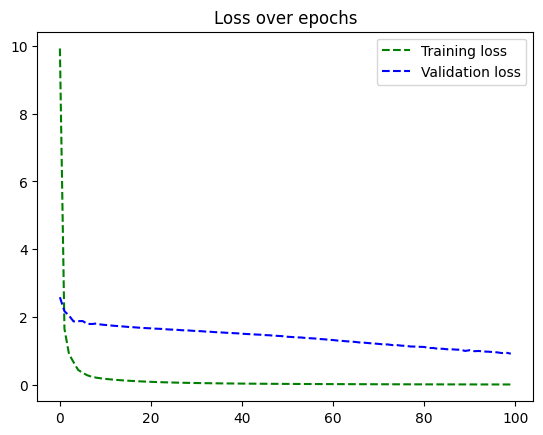

In [19]:
plt.plot(history_vgg.history['loss'], '--g', label='Training loss')
plt.plot(history_vgg.history['val_loss'], '--b', label='Validation loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

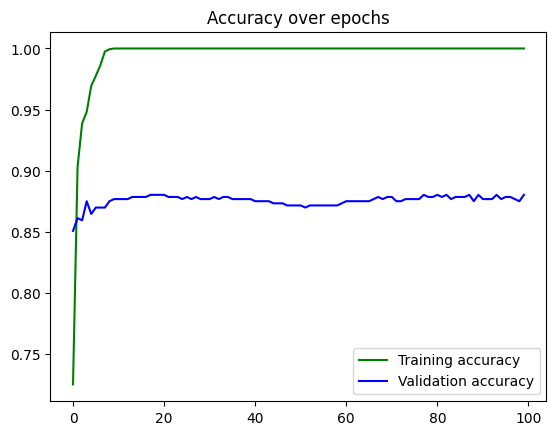

In [20]:
plt.plot(history_vgg.history['accuracy'], '-g', label='Training accuracy')
plt.plot(history_vgg.history['val_accuracy'], '-b', label='Validation accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

### Visualizing convolutions

1/1 [==============================] - 0s 35ms/step


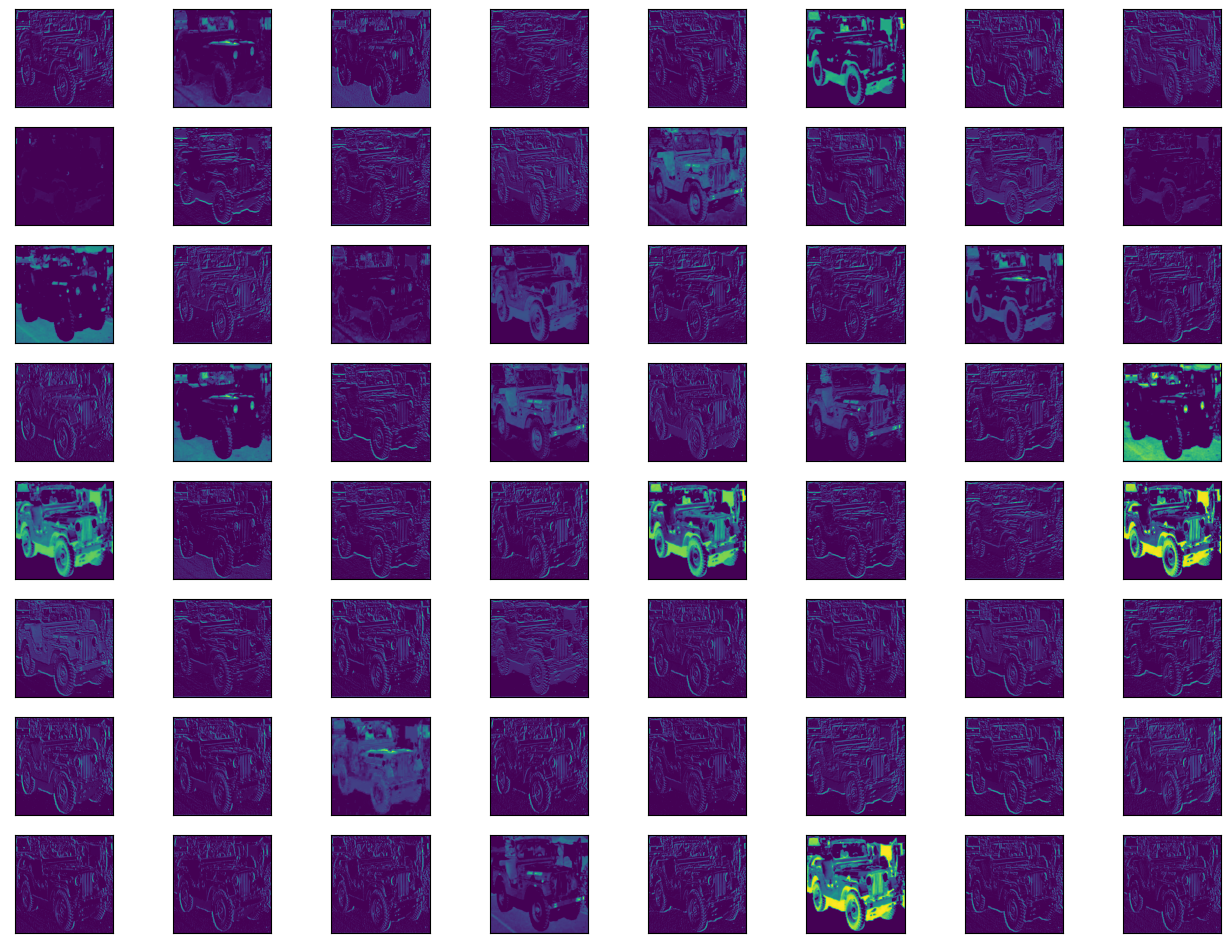

In [23]:
from keras import Model

visualize_model = Model(inputs=vggmodel.inputs, outputs=vggmodel.layers[1].output)
feature_maps = visualize_model.predict(img)

n = 8
plt.figure(figsize=(16,12))
for i in range(n**2):
    # specify subplot and turn of axis
    ax = plt.subplot(n, n, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
# show the figure
plt.show()